# RNN - LSTM

## 1. Data Preprocessing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')

In [3]:
training_set = dataset_train.iloc[:,1:2].values

In [4]:
training_set.shape

(1258, 1)

In [5]:
training_set[1:10]

array([[ 331.27],
       [ 329.83],
       [ 328.34],
       [ 322.04],
       [ 313.7 ],
       [ 310.59],
       [ 314.43],
       [ 311.96],
       [ 314.81]])

Feature scaling: Normalisation

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))

In [7]:
training_set_scaled = sc.fit_transform(training_set)

In [8]:
training_set_scaled[1:10]

array([[ 0.09701243],
       [ 0.09433366],
       [ 0.09156187],
       [ 0.07984225],
       [ 0.0643277 ],
       [ 0.0585423 ],
       [ 0.06568569],
       [ 0.06109085],
       [ 0.06639259]])

** Creating a data structure with 60 timesteps and 1 output **

In [9]:
X_train = []
y_train = []

In [10]:
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

In [11]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [12]:
X_train.shape, y_train.shape

((1198, 60), (1198,))

**Reshaping the data**

https://keras.io/layers/recurrent/

To add new indicators

In [13]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [14]:
X_train.shape

(1198, 60, 1)

In [15]:
X_train[0]

array([[ 0.08581368],
       [ 0.09701243],
       [ 0.09433366],
       [ 0.09156187],
       [ 0.07984225],
       [ 0.0643277 ],
       [ 0.0585423 ],
       [ 0.06568569],
       [ 0.06109085],
       [ 0.06639259],
       [ 0.0614257 ],
       [ 0.07474514],
       [ 0.02797827],
       [ 0.02379269],
       [ 0.02409033],
       [ 0.0159238 ],
       [ 0.01078949],
       [ 0.00967334],
       [ 0.01642607],
       [ 0.02100231],
       [ 0.02280676],
       [ 0.02273235],
       [ 0.02810849],
       [ 0.03212665],
       [ 0.0433812 ],
       [ 0.04475779],
       [ 0.04790163],
       [ 0.0440695 ],
       [ 0.04648783],
       [ 0.04745517],
       [ 0.04873875],
       [ 0.03936305],
       [ 0.04137213],
       [ 0.04034898],
       [ 0.04784582],
       [ 0.04325099],
       [ 0.04356723],
       [ 0.04286033],
       [ 0.04602277],
       [ 0.05398467],
       [ 0.05738894],
       [ 0.05714711],
       [ 0.05569611],
       [ 0.04421832],
       [ 0.04514845],
       [ 0

In [16]:
y_train[:10]

array([ 0.08627874,  0.08471612,  0.07454052,  0.07883771,  0.07238262,
        0.06663442,  0.06315574,  0.06782499,  0.06823424,  0.07601012])

## 2. Building the RNN

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


Initializing the RNN

In [18]:
regressor = Sequential()

Configuring the LSTM neural network

* return_sequences=True if after the LSTM layer goes another LSTM layer
* optimizer: recomended "RMSprop"; "adam" also ok 

In [19]:
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.20))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.20))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.20))
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.20))
regressor.add(Dense(units=1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [20]:
# epochs = 100

regressor.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
1198/1198 [==============================] - 5s - loss: 0.0520     
Epoch 2/100
1198/1198 [==============================] - 6s - loss: 0.0069     
Epoch 3/100
1198/1198 [==============================] - 5s - loss: 0.0052     
Epoch 4/100
1198/1198 [==============================] - 7s - loss: 0.0054     
Epoch 5/100
1198/1198 [==============================] - 7s - loss: 0.0049     
Epoch 6/100
1198/1198 [==============================] - 7s - loss: 0.0044     
Epoch 7/100
1198/1198 [==============================] - 6s - loss: 0.0050     
Epoch 8/100
1198/1198 [==============================] - 5s - loss: 0.0047     
Epoch 9/100
1198/1198 [==============================] - 6s - loss: 0.0043     
Epoch 10/100
1198/1198 [==============================] - 5s - loss: 0.0047     
Epoch 11/100
1198/1198 [==============================] - 5s - loss: 0.0042     
Epoch 12/100
1198/1198 [==============================] - 7s - loss: 0.0047     
Epoch 13/100
1198/1198 [=============

## 3. Making the predictions and visualising the results

Getting the real stock price of 2017

In [21]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:,1:2].values

Getting the predicted stock price of 2017

In [22]:
dataset_total = pd.concat((dataset_train["Open"], 
                           dataset_test["Open"]), axis=0)

inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

In [23]:
inputs.shape

(80,)

In [24]:
inputs = inputs.reshape(-1, 1)
inputs.shape

(80, 1)

In [25]:
inputs = sc.transform(inputs)

In [26]:
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)

In [27]:
X_test.shape

(20, 60)

In [28]:
ini_shape = X_test.shape
X_test = X_test.reshape(ini_shape[0], ini_shape[1], 1)
X_test.shape

(20, 60, 1)

In [29]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [30]:
predicted_stock_price.shape

(20, 1)

In [31]:
predicted_stock_price

array([[ 787.08862305],
       [ 784.28643799],
       [ 784.2510376 ],
       [ 785.66394043],
       [ 789.11431885],
       [ 795.14141846],
       [ 800.9309082 ],
       [ 803.59014893],
       [ 803.9753418 ],
       [ 803.44799805],
       [ 802.85443115],
       [ 802.36413574],
       [ 802.07385254],
       [ 802.53179932],
       [ 803.50097656],
       [ 807.95544434],
       [ 814.9901123 ],
       [ 822.79547119],
       [ 827.37835693],
       [ 823.684021  ]], dtype=float32)

Visualizing the final results

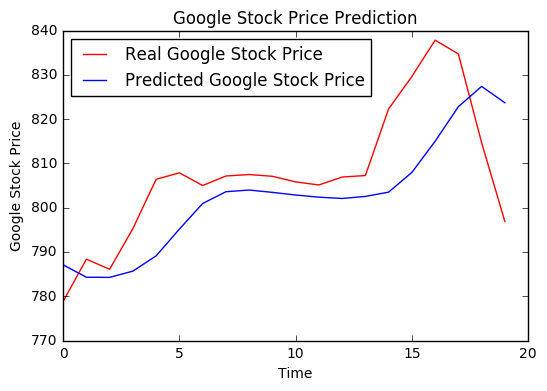

In [33]:
plt.plot(real_stock_price, color = 'red', 
         label = 'Real Google Stock Price')

plt.plot(predicted_stock_price, color = 'blue', 
         label = 'Predicted Google Stock Price')

plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend(loc=2)
plt.show()